In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.text import Annotation
from matplotlib.offsetbox import OffsetBox
from matplotlib.path import Path
import matplotlib.patches as patches
wheat= pd.read_csv("wheat_calculation_final1.csv")
rice= pd.read_csv("Rice_calculation_final1.csv")
del rice['Unnamed: 0']
del wheat['Unnamed: 0']


In [ ]:
#for P 

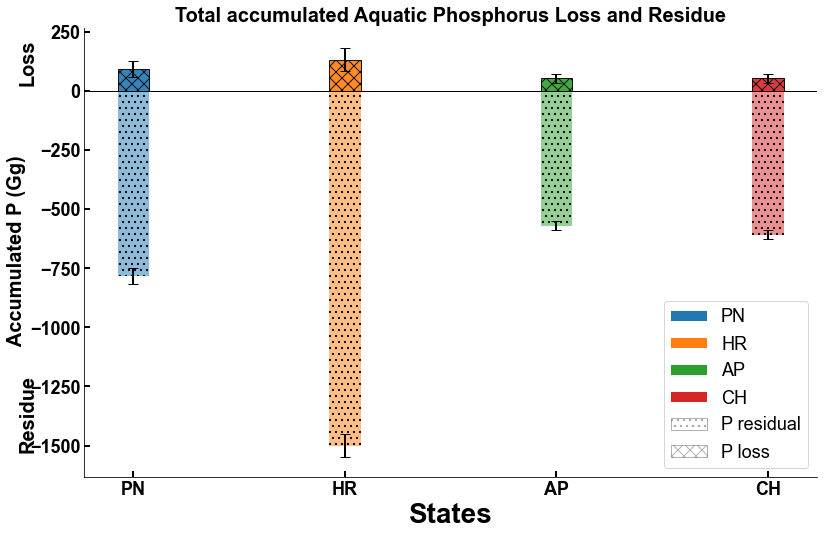

In [13]:
# Combine Rice_T_P_kg and Wheat_T_P_kg as combined_r_w_P_kg
rice['combined_r_w_P_kg'] = rice['Rice_T_P_kg'] + wheat['Wheat_T_P_kg']
rice['combined_r_w_surplus_P_kg']=  rice['P_surplus'] + wheat['P_surplus']
# Select the top 4 sources based on P_residue values
top_sources = ['PN', 'HR', 'AP', 'CH']
# Define custom colors for each source
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 25
plt.rcParams['axes.titlesize'] = 70
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
#plt.rcParams['axes.facecolor'] = 'whitesmoke'
for ax in [ax]:
    ax.tick_params(axis='both', which='both', direction='in', length=6, width=1, colors='black')
    ax.set_title(ax.get_title(), fontweight='bold')
    ax.set_xlabel(ax.get_xlabel(), fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontweight='bold')
    for label in ax.get_xticklabels():
        label.set_weight('bold')
        #label.set_rotation(45)
    for label in ax.get_yticklabels():
        label.set_weight('bold')
# Set the width of each bar
bar_width = 0.15

# Create an array of indices for the x-axis ticks
index = np.arange(len(top_sources))

for i, source in enumerate(top_sources):
    # Filter the data for the specific source
    filtered_data = rice[rice['source'] == source]
    
    # Calculate yearly cumulative sum for combined_r_w_P_kg
    cumulative_data = filtered_data.groupby('Year')['combined_r_w_P_kg'].sum().cumsum()
    cumulative_data=cumulative_data/1000000
    cumulative_surplus = filtered_data.groupby('Year')['combined_r_w_surplus_P_kg'].sum().cumsum()
    cumulative_surplus=cumulative_surplus/1000000
    num_iterations = 1000
    
    leach_samples = np.empty((num_iterations, len(cumulative_data)))
    residue_samples = np.empty((num_iterations, len(cumulative_surplus)))
    
    for j in range(num_iterations):
        # Randomly sample the leach coefficient within the specified range
        leach_coeff_sample = np.random.uniform(0.071, 0.125)
        
        # Calculate the leach samples based on the sampled coefficient
        leach_samples[j] = cumulative_data * leach_coeff_sample
        residue_samples[j] = cumulative_surplus - (cumulative_data * leach_coeff_sample)
    
    # Calculate the lower and upper bounds for the error bars
    leach_lower = np.percentile(leach_samples, 2.5, axis=0)
    leach_upper = np.percentile(leach_samples, 97.5, axis=0)
    residue_lower = np.percentile(residue_samples, 2.5, axis=0)
    residue_upper = np.percentile(residue_samples, 97.5, axis=0)
    
    # Calculate the mean of the leach samples
    leach_mean = np.mean(leach_samples, axis=0)
    residue_mean = np.mean(residue_samples, axis=0)
    
    # Plot the bars with error bars for P loss
    bars_loss = ax.bar(index[i], cumulative_data.iloc[-1] * 0.071, color=colors[i],hatch='xx', edgecolor='black', width=bar_width, alpha=0.9, label='P Loss')
    ax.errorbar(index[i], cumulative_data.iloc[-1] * 0.071, yerr=[[leach_mean[-1] - leach_lower[-1]], [leach_upper[-1] - leach_mean[-1]]],
                color='black', capsize=5, linewidth=2)

    # Plot the bars with error bars for P residue
    hatch_pattern = ".."
    bars_residue = ax.bar(index[i], -(cumulative_surplus.iloc[-1] - (cumulative_data.iloc[-1] * 0.071)), color=colors[i],
                          hatch=hatch_pattern, width=bar_width, alpha=0.5, label='P Residue')
    ax.errorbar(index[i], -(cumulative_surplus.iloc[-1] - (cumulative_data.iloc[-1] * 0.071)),
                yerr=[[residue_mean[-1] - residue_lower[-1]], [residue_upper[-1] - residue_mean[-1]]],
                color='black', capsize=5, linewidth=2)

# Add a black line at x-axis value 0.0
ax.axhline(0.0, color='black', linewidth=1)
# Set x-axis and y-axis labels
ax.set_xlabel('States',weight='bold',fontsize=28)
ax.set_ylabel(' Accumulated P (Gg)',ha='center',weight='bold',fontsize=20)
# Add a custom legend
legend_elements = [Line2D([0], [0], color=colors[i], linestyle='--', linewidth=10, label=source) for i, source in enumerate(top_sources)]
legend_elements.append(Patch(facecolor='white', edgecolor='black',hatch=hatch_pattern, alpha=0.3, label='P residual'))
legend_elements.append(Patch(facecolor='white', edgecolor='black',hatch='xx', alpha=0.3, label='P loss'))
legend = ax.legend(handles=legend_elements, loc='lower right',fontsize=18)
# Set x-axis tick positions and labels
ax.set_xticks(index,weight='bold',fontsize=18)
ax.set_xticklabels(top_sources,weight='bold',fontsize=18)
# Add a title
ax.set_title('Total accumulated Aquatic Phosphorus Loss and Residue',ha='center',weight='bold',fontsize=20)
# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Customize tick labels
ax.tick_params(axis='both', which='both', direction='in', length=6, width=2, colors='black')

# Add labels above and below zero line
ax.text(-0.5, 20, 'Loss', ha='center', va='bottom', rotation=90, weight='bold', fontsize=20)
ax.text(-0.5, -1200, 'Residue', ha='center', va='top', rotation=90, weight='bold', fontsize=20)

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
#for N 

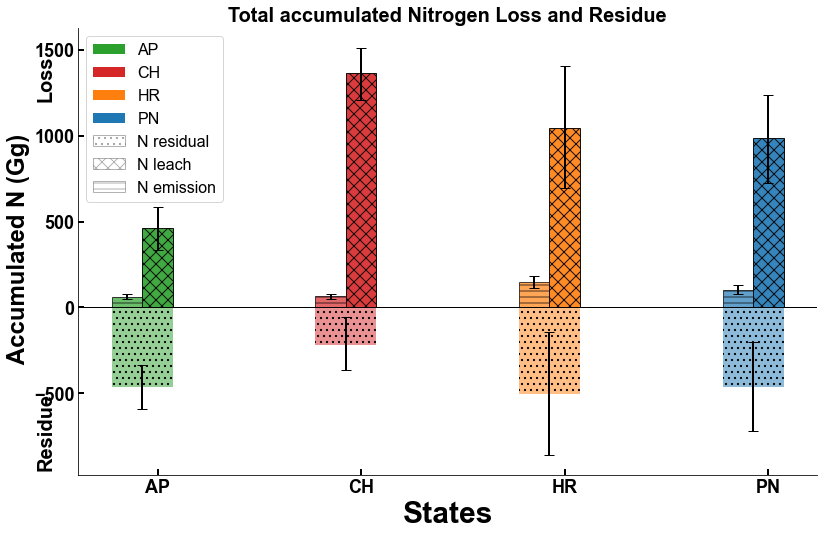

In [15]:
 
emission_coeff= pd.read_csv(r"E:\nutrient transport\revision_data\nutrient_input\leach_coeff.csv")
emission_coeff['fN2O[% of Nsurplus]']=emission_coeff['fN2O[% of Nsurplus]']/100
emission_coeff['fNO3_leaching_to_GW[% of Nsurplus]']=emission_coeff['fNO3_leaching_to_GW[% of Nsurplus]']/100

# Combine Rice_T_P_kg and Wheat_T_P_kg as combined_r_w_P_kg
rice['combined_r_w_N_surplus'] = (rice['N_surplus'] + wheat['N_surplus'])
#rice['combined_r_w_P_Gg'] = (rice['Rice_T_P_kg'] + wheat['Wheat_T_P_kg'])
#rice['']
# Select the top 4 sources based on P_residue values
top_sources = ['AP', 'CH', 'HR', 'PN']
# Define custom colors for each source
colors = ['tab:green','tab:red','tab:orange','tab:blue' ]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))


# Set the width of each bar
bar_width1 = 0.15
bar_width2 = 0.15
bar_width3 = 0.30



# Create an array of indices for the x-axis ticks
index = np.arange(len(top_sources))

for i, source in enumerate(top_sources):
    # Filter the data for the specific source
    filtered_data = rice[rice['source'] == source]
    cumulative_data = filtered_data.groupby(['source'])['combined_r_w_N_surplus'].sum()

    cumulative_data=cumulative_data/1000000
    num_iterations = 1000
    
    leach_samples = np.empty((num_iterations, len(cumulative_data)))
    residue_samples = np.empty((num_iterations, len(cumulative_surplus)))
    emission_sample = np.empty((num_iterations, len(cumulative_surplus)))

    for j in range(num_iterations):
        # Randomly sample the leach coefficient within the specified range
        leach_coeff_sample = np.random.uniform(0.15, 0.30)
        emission_coeff_sample=np.random.uniform(0.025, 0.04)
        
        # Calculate the leach samples based on the sampled coefficient
        leach_samples[j] = cumulative_data * leach_coeff_sample
        emission_sample[j]= cumulative_data * emission_coeff_sample
        residue_samples[j] = cumulative_data - (cumulative_data * leach_coeff_sample)-(cumulative_data * emission_coeff_sample)
    
    # Calculate the lower and upper bounds for the error bars
    leach_lower = np.percentile(leach_samples, 2.5, axis=0)
    leach_upper = np.percentile(leach_samples, 97.5, axis=0)
    emission_lower = np.percentile(emission_sample, 2.5, axis=0)
    emission_upper = np.percentile(emission_sample, 97.5, axis=0)    
    residue_lower = np.percentile(residue_samples, 2.5, axis=0)
    residue_upper = np.percentile(residue_samples, 97.5, axis=0)
    
    # Calculate the mean of the leach samples
    leach_mean = np.mean(leach_samples, axis=0)
    emission_mean = np.mean(emission_sample, axis=0)

    residue_mean = np.mean(residue_samples, axis=0)
    
    # Plot the bars with error bars for N loss
    hatch_emission="xx"

    #print(emission_coeff['fNO3_leaching_to_GW[% of Nsurplus]'].iloc[i])
    bars_loss = ax.bar(index[i], cumulative_data.iloc[-1] * emission_coeff['fNO3_leaching_to_GW[% of Nsurplus]'].iloc[i], color=colors[i],hatch=hatch_emission, edgecolor='black', width=bar_width1, alpha=0.9, label='N Leach')
    ax.errorbar(index[i], cumulative_data.iloc[-1] * emission_coeff['fNO3_leaching_to_GW[% of Nsurplus]'].iloc[i], yerr=[[leach_mean[-1] - leach_lower[-1]], [leach_upper[-1] - leach_mean[-1]]],color='black', capsize=5, linewidth=2)
    
    # Plot the bars with error bars for N emission
    hatch_emission="xx"
    bars_emission = ax.bar(index[i]-bar_width1, cumulative_data.iloc[-1] * emission_coeff['fN2O[% of Nsurplus]'].iloc[i], color=colors[i],hatch='--', edgecolor='black', width=bar_width2, alpha=0.7, label='N emission')
    ax.errorbar(index[i]-bar_width1, cumulative_data.iloc[-1] * emission_coeff['fN2O[% of Nsurplus]'].iloc[i], yerr=[[emission_mean[-1] - emission_lower[-1]], [emission_upper[-1] - emission_mean[-1]]],color='black', capsize=5, linewidth=2)

    # Plot the bars with error bars for P residue
    hatch_pattern = ".."
    bars_residue = ax.bar(index[i]-bar_width1/2,-(cumulative_surplus.iloc[-1]*(1-emission_coeff['fNO3_leaching_to_GW[% of Nsurplus]'].iloc[i]-emission_coeff['fN2O[% of Nsurplus]'].iloc[i])), color=colors[i],hatch=hatch_pattern, width=bar_width3, alpha=0.5, label='N Residue')
    ax.errorbar(index[i]-bar_width1/2,-(cumulative_surplus.iloc[-1] * (1 - emission_coeff['fNO3_leaching_to_GW[% of Nsurplus]'].iloc[i] - emission_coeff['fN2O[% of Nsurplus]'].iloc[i])),yerr=[[residue_mean[-1] - residue_lower[-1]], [residue_upper[-1] - residue_mean[-1]]],color='black', capsize=5, linewidth=2)


# Add a black line at x-axis value 0.0
ax.axhline(0.0, color='black', linewidth=1)

# Set x-axis and y-axis labels
ax.set_xlabel('States',weight='bold')
ax.set_ylabel(' Accumulated N (Gg)',weight='bold', fontsize=24)



# Add a custom legend
legend_elements = [Line2D([0], [0], color=colors[i], linestyle='--', linewidth=10, label=source) for i, source in enumerate(top_sources)]
legend_elements.append(Patch(facecolor='white', edgecolor='black',hatch=hatch_pattern, alpha=0.3, label='N residual'))
legend_elements.append(Patch(facecolor='white', edgecolor='black',hatch='xx', alpha=0.3, label='N leach'))
legend_elements.append(Patch(facecolor='white', edgecolor='black',hatch='--', alpha=0.3, label='N emission'))

legend = ax.legend(handles=legend_elements, loc='upper left', fontsize=16)


# Set x-axis tick positions and labels
ax.set_xticks(index)
ax.set_xticklabels(top_sources)
# Add a title
ax.set_title('Total accumulated Nitrogen Loss and Residue',ha='center',weight='bold', fontsize=20)
# Remove the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Customize tick labels
ax.tick_params(axis='both', which='both', direction='in', length=6, width=2, colors='black')

for label in ax.get_xticklabels():
    label.set_weight('bold')
        #label.set_rotation(45)
for label in ax.get_yticklabels():
    label.set_weight('bold')



# Add labels above and below zero line
ax.text(-0.55, 1200, 'Loss' ,ha='center', va='bottom', rotation=90, weight='bold', fontsize=20)
ax.text(-0.55, -950, 'Residue',  ha='center', va='bottom', rotation=90, weight='bold', fontsize=20)

# Adjust spacing
plt.tight_layout()
# Show the plot
plt.show()
